In [1]:
%matplotlib inline


분류기(Classifier) 학습하기
============================

----------------------------

다음과 같은 단계로 진행해보겠습니다:

1. ``torchvision`` 을 사용하여 CIFAR100의 학습용 / 시험용 데이터셋을
   불러오고, 정규화(nomarlizing)합니다.
2. 합성곱 신경망(Convolution Neural Network)을 정의합니다.
3. 손실 함수를 정의합니다.
4. 학습용 데이터를 사용하여 신경망을 학습합니다.
5. 시험용 데이터를 사용하여 신경망을 검사합니다.

1. CIFAR100을 불러오고 정규화하기
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

``torchvision`` 을 사용하여 매우 쉽게 CIFAR100을 불러올 수 있습니다.


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
# from google.colab import files
# This mounts your Google Drive to the Colab VM.
# from google.colab import drive
# drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
# FOLDERNAME = None
# FOLDERNAME = "2021"
# assert FOLDERNAME is not None, "[!] Enter the foldername."

# import sys
# sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

torch.manual_seed(100) #실험을 동일하게 진행하기 위해서 사용

batch_size = 64

torchvision 데이터셋의 출력(output)은 [0, 1] 범위를 갖는 PILImage 이미지입니다.
이를 [-1, 1]의 범위로 정규화된 Tensor로 변환합니다.

<div class="alert alert-info"><h4>Note</h4><p>만약 Windows 환경에서 BrokenPipeError가 발생한다면,
    torch.utils.data.DataLoader()의 num_worker를 0으로 설정해보세요.</p></div>



In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# CUDA 기기가 존재한다면, 아래 코드가 CUDA 장치를 출력합니다:

print(device)

cuda:0


In [5]:


transform_train = transforms.Compose([transforms.RandomHorizontalFlip(), # 랜덤하게 좌우반전
                                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2), #밝기, 대비, 채도를 랜덤하게 조절
                                      transforms.RandomRotation(10), #10도 이하로 랜덤하게 기울인다.
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) #정규화
                                     ])

transformer = transforms.Compose([transforms.ToTensor(),
                                  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(dataset=trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transformer)
testloader = torch.utils.data.DataLoader(dataset=testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
"""
#trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                        download=True, transform=transform)
trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

#testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                       download=True, transform=transform)
testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

#classes = ('plane', 'car', 'bird', 'cat',
#           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

"""

"\n#trainset = torchvision.datasets.CIFAR10(root='./data', train=True,\n#                                        download=True, transform=transform)\ntrainset = torchvision.datasets.CIFAR100(root='./data', train=True,\n                                        download=True, transform=transform)\ntrainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,\n                                          shuffle=True, num_workers=2)\n\n#testset = torchvision.datasets.CIFAR10(root='./data', train=False,\n#                                       download=True, transform=transform)\ntestset = torchvision.datasets.CIFAR100(root='./data', train=False,\n                                       download=True, transform=transform)\ntestloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,\n                                         shuffle=False, num_workers=2)\n\n#classes = ('plane', 'car', 'bird', 'cat',\n#           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')\n\n"

학습용 이미지 몇 개를 보겠습니다.



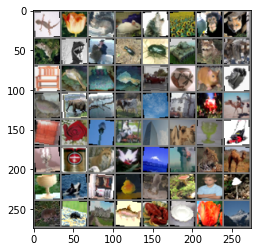

lizard tulip squirrel rabbit  wolf sunflower chimpanzee   fox lizard dinosaur flatfish beetle cockroach  tank  wolf cattle chair turtle   bed   ray pickup_truck  bowl hamster telephone trout elephant bridge cattle cloud house  rose camel wardrobe  rose  lamp lawn_mower skyscraper camel   cup lawn_mower   cup   can   fox tulip mountain skyscraper leopard camel   cup whale wardrobe  pear elephant mushroom   boy mushroom shrew beetle castle trout lobster plate tulip mountain


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

2. 합성곱 신경망(Convolution Neural Network) 정의하기
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
이전의 신경망 섹션에서 신경망을 복사한 후, (기존에 1채널 이미지만 처리하도록
정의된 것을) 3채널 이미지를 처리할 수 있도록 수정합니다.



In [8]:
import torch.nn as nn
import torch.nn.functional as F

class VGGNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1) 
        self.conv2 = nn.Conv2d(64, 64 , kernel_size=3, padding=1)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)

        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, padding=1)

        self.conv7 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv8 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv9 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv10 = nn.Conv2d(512, 512, kernel_size=3, padding=1)

        self.pool = nn.MaxPool2d(2, 2) #2*2 평균값 pooling

        self.fc1 = nn.Linear( 512*2*2, 4096 ) #flat layer
        self.fc2 = nn.Linear(4096, 4096) 
        self.fc3 = nn.Linear(4096, 100) 
        
        self.bn1=nn.BatchNorm2d(64) #채널 갯수
        self.bn2=nn.BatchNorm2d(128)
        self.bn3=nn.BatchNorm2d(256)
        self.bn4=nn.BatchNorm2d(512)
        #self.dropout=nn.Dropout2d(0.5)

    def forward(self, x): #계산 그래프
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn1(self.conv2(x))))
        x = F.relu(self.bn2(self.conv3(x)))
        x = self.pool(F.relu(self.bn2(self.conv4(x))))
        x = F.relu(self.bn3(self.conv5(x)))
        x = self.pool(F.relu(self.bn3(self.conv6(x))))
        x = F.relu(self.bn4(self.conv7(x)))
        x = F.relu(self.bn4(self.conv8(x)))
        x = F.relu(self.bn4(self.conv9(x)))
        x = self.pool(F.relu(self.bn4(self.conv10(x))))      

        x = x.view(-1, 512*2*2)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x=  self.fc3(x)
        return x

net = VGGNet()

"""
class ResidualBlock(nn.Module):
  def __init__(self, in_channels, out_channels, stride=1, down_sample=False):
    super(ResidualBlock, self).__init__()
    self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                         stride=stride, padding=1, bias=False) 
    self.bn1 = nn.BatchNorm2d(out_channels)
 
    self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, 
                         stride=1, padding=1, bias=False) 
    self.bn2 = nn.BatchNorm2d(out_channels)
    self.stride = stride
    
    if down_sample:
      self.down_sample = IdentityPadding(in_channels, out_channels, stride)
    else:
      self.down_sample = None


  def forward(self, x):
    shortcut = x

    out = self.relu(self.bn1(self.conv1(x)))
    out = self.bn2(self.conv2(out))

    if self.down_sample is not None:
      shortcut = self.down_sample(x)

    out += shortcut
    out = F.relu(out)
    return out

class IdentityPadding(nn.Module):
    def __init__(self, in_channels, out_channels, stride):
        super(IdentityPadding, self).__init__()

        self.pooling = nn.MaxPool2d(1, stride=stride)
        self.add_channels = out_channels - in_channels
    
    def forward(self, x):
        out = F.pad(x, (0, 0, 0, 0, 0, self.add_channels))
        out = self.pooling(out)
        return out

def get_layers(self, block, in_channels, out_channels, stride):
    if stride == 2:
        down_sample = True
    else:
        down_sample = False
  
    layers_list = nn.ModuleList([block(in_channels, out_channels, stride, down_sample)])
    
    for _ in range(self.num_layers - 1):
        layers_list.append(block(out_channels, out_channels))

    return nn.Sequential(*layers_list)

def Resnet():
    block = ResidualBlock
    # total number of layers if 6n + 2. if n is 5 then the depth of network is 32.
    model = ResNet(5, block) 
    return model          

net = ResNet()
"""

'\nclass ResidualBlock(nn.Module):\n  def __init__(self, in_channels, out_channels, stride=1, down_sample=False):\n    super(ResidualBlock, self).__init__()\n    self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, \n                         stride=stride, padding=1, bias=False) \n    self.bn1 = nn.BatchNorm2d(out_channels)\n \n    self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, \n                         stride=1, padding=1, bias=False) \n    self.bn2 = nn.BatchNorm2d(out_channels)\n    self.stride = stride\n    \n    if down_sample:\n      self.down_sample = IdentityPadding(in_channels, out_channels, stride)\n    else:\n      self.down_sample = None\n\n\n  def forward(self, x):\n    shortcut = x\n\n    out = self.relu(self.bn1(self.conv1(x)))\n    out = self.bn2(self.conv2(out))\n\n    if self.down_sample is not None:\n      shortcut = self.down_sample(x)\n\n    out += shortcut\n    out = F.relu(out)\n    return out\n\nclass IdentityPadding(nn.Module):\n

In [47]:

class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, in_channels, out_channels):
        super().__init__()

        # BatchNorm에 bias가 포함되어 있으므로, conv2d는 bias=False로 설정합니다.
        self.residual_function = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels * BasicBlock.expansion, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(out_channels * BasicBlock.expansion),
        )

        # identity mapping, input과 output의 feature map size, filter 수가 동일한 경우 사용.
        self.shortcut = nn.Sequential()

        self.relu = nn.ReLU()

        # projection mapping using 1x1conv
        if stride != 1 or in_channels != BasicBlock.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels * BasicBlock.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * BasicBlock.expansion)
            )

    def forward(self, x):
        x = self.residual_function(x) + self.shortcut(x)
        x = self.relu(x)
        return x

class BottleNeck(nn.Module):
    expansion = 4
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()

        self.residual_function = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels * BottleNeck.expansion, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels * BottleNeck.expansion),
        )

        self.shortcut = nn.Sequential()

        self.relu = nn.ReLU()

        if stride != 1 or in_channels != out_channels * BottleNeck.expansion:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels*BottleNeck.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels*BottleNeck.expansion)
            )
            
    def forward(self, x):
        x = self.residual_function(x) + self.shortcut(x)
        x = self.relu(x)
        return x

class ResNet(nn.Module):
    def __init__(self, block, num_block, num_classes=100, init_weights=True):
        super().__init__()

        self.in_channels=64

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=1, padding=3, bias=False), #64*32*32
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) #64*16*16
        )

        self.conv2_x = self._make_layer(block, 64, num_block[0], 1) #64*16*16=> 128*16*16
        self.conv3_x = self._make_layer(block, 128, num_block[1], 2) #128*16*16=> 256*16*16
        self.conv4_x = self._make_layer(block, 256, num_block[2], 2) #256*16*16=> 512*16*16
        self.conv5_x = self._make_layer(block, 512, num_block[3], 2) #512*16*16=> 1024*16*16

        self.MaxPool = nn.AdaptiveAvgPool2d((1,1)) #1024*8*8
        self.fc = nn.Linear(512*block.expansion, num_classes) #512 * block.expansion

        # weights inittialization
        #if init_weights:
         #   self._initialize_weights()

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion

        return nn.Sequential(*layers)

    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2_x(x)
        x = self.conv3_x(x)
        x = self.conv4_x(x)
        x = self.conv5_x(x)
        x = self.MaxPool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x



In [48]:

def resnet18():
    return ResNet(BasicBlock, [2,2,2,2])

def resnet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])

def resnet50():
    return ResNet(BottleNeck, [3,4,6,3])

def resnet101():
    return ResNet(BottleNeck, [3, 4, 23, 3])

def resnet152():
    return ResNet(BottleNeck, [3, 8, 36, 3])

net = resnet50()

In [49]:
"""

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1) 
        self.conv2 = nn.Conv2d(32, 64 , kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2) #2*2 평균값 pooling

        self.fc1 = nn.Linear( 256*8*8, 512 ) #flat layer
        self.fc2 = nn.Linear(512, 256) 
        self.fc3 = nn.Linear(256, 128) 
        self.fc4 = nn.Linear(128, 100)
        
        self.bn1=nn.BatchNorm2d(32) #채널 갯수
        self.bn2=nn.BatchNorm2d(64)
        self.bn3=nn.BatchNorm2d(128)
        self.bn4=nn.BatchNorm2d(256)

        self.dropout2=nn.Dropout2d(0.5)

    def forward(self, x): #계산 그래프
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(self.dropout2(F.relu(self.bn4(self.conv4(x))))) self.dropout2=nn.Dropout2d(0.5)
        x = x.view(-1, 256 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x=  self.fc4(x)
        return x



"""

'\n\nclass Net(nn.Module):\n    def __init__(self):\n        super().__init__()\n        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1) \n        self.conv2 = nn.Conv2d(32, 64 , kernel_size=3, padding=1)\n        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)\n        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)\n        self.pool = nn.MaxPool2d(2, 2) #2*2 평균값 pooling\n\n        self.fc1 = nn.Linear( 256*8*8, 512 ) #flat layer\n        self.fc2 = nn.Linear(512, 256) \n        self.fc3 = nn.Linear(256, 128) \n        self.fc4 = nn.Linear(128, 100)\n        \n        self.bn1=nn.BatchNorm2d(32) #채널 갯수\n        self.bn2=nn.BatchNorm2d(64)\n        self.bn3=nn.BatchNorm2d(128)\n        self.bn4=nn.BatchNorm2d(256)\n\n        self.dropout2=nn.Dropout2d(0.5)\n\n    def forward(self, x): #계산 그래프\n        x = F.relu(self.bn1(self.conv1(x)))\n        x = self.pool(F.relu(self.bn2(self.conv2(x))))\n        x = F.relu(self.bn3(self.conv3(x)))\n        x = self.po

In [50]:
"""
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, padding=2) 
        self.conv2 = nn.Conv2d(32, 64 , kernel_size=5,padding=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=5,padding=2)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=5,padding=2)
        self.pool = nn.MaxPool2d(2, 2) #2*2 중 가장 큰 값 pooling

        self.fc1 = nn.Linear(256*2*2, 512 ) #flat layer
        self.fc2 = nn.Linear(512, 256) 
        self.fc3 = nn.Linear(256, 128) 
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 100)
        self.bn1=nn.BatchNorm2d(32) #채널 갯수
        self.bn2=nn.BatchNorm2d(64)
        self.bn3=nn.BatchNorm2d(128)
        self.bn4=nn.BatchNorm2d(256)

    def forward(self, x): #계산 그래프
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = x.view(-1, 256 * 2 * 2)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))


        
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, padding=2) 
        self.conv2 = nn.Conv2d(32, 64 , kernel_size=5,padding=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=5,padding=2)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=5,padding=2)
        self.pool = nn.MaxPool2d(2, 2) #2*2 중 가장 큰 값 pooling
        #nn.AvgPool2d(3, stride=2)
        self.fc1 = nn.Linear(256*2*2, 512 ) #flat layer
        self.fc2 = nn.Linear(512, 256) 
        self.fc3 = nn.Linear(256, 128) 
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 100)

        self.bn1=nn.BatchNorm2d(32) #채널 갯수
        self.bn2=nn.BatchNorm2d(64)
        self.bn3=nn.BatchNorm2d(128)
        self.bn4=nn.BatchNorm2d(256)

        #self.dropout1=nn.Dropout2d(0.2)
        #self.dropout2=nn.Dropout2d(0.2)
        #self.dropout3=nn.Dropout2d(0.2)
        self.dropout4=nn.Dropout2d(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(self.dropout4(F.relu(self.bn4(self.conv4(x)))))
        x = x.view(-1, 256 * 2 * 2)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.log_softmax(self.fc5(x), dim=1)
        return x

"""

'\n        super().__init__()\n        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, padding=2) \n        self.conv2 = nn.Conv2d(32, 64 , kernel_size=5,padding=2)\n        self.conv3 = nn.Conv2d(64, 128, kernel_size=5,padding=2)\n        self.conv4 = nn.Conv2d(128, 256, kernel_size=5,padding=2)\n        self.pool = nn.MaxPool2d(2, 2) #2*2 중 가장 큰 값 pooling\n\n        self.fc1 = nn.Linear(256*2*2, 512 ) #flat layer\n        self.fc2 = nn.Linear(512, 256) \n        self.fc3 = nn.Linear(256, 128) \n        self.fc4 = nn.Linear(128, 64)\n        self.fc5 = nn.Linear(64, 100)\n        self.bn1=nn.BatchNorm2d(32) #채널 갯수\n        self.bn2=nn.BatchNorm2d(64)\n        self.bn3=nn.BatchNorm2d(128)\n        self.bn4=nn.BatchNorm2d(256)\n\n    def forward(self, x): #계산 그래프\n        x = self.pool(F.relu(self.bn1(self.conv1(x))))\n        x = self.pool(F.relu(self.bn2(self.conv2(x))))\n        x = self.pool(F.relu(self.bn3(self.conv3(x))))\n        x = self.pool(F.relu(self.bn4(self.conv4(x))))\n     

3. 손실 함수와 Optimizer 정의하기
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
교차 엔트로피 손실(Cross-Entropy loss)과 모멘텀(momentum) 값을 갖는 SGD를 사용합니다.



In [51]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
 
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0001)  

4. 신경망 학습하기
^^^^^^^^^^^^^^^^^^^^

이제 재미있는 부분이 시작됩니다.
단순히 데이터를 반복해서 신경망에 입력으로 제공하고, 최적화(Optimize)만 하면
됩니다.



In [71]:
net.to(device)

epochs=20

for epoch in range(epochs):   # 데이터셋을 수차례 반복합니다.
    print(epoch)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data[0].to(device),data[1].to(device)
        #scheduler.step()
        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 50 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

0
[1,     1] loss: 0.001
[1,    51] loss: 0.058
[1,   101] loss: 0.058
[1,   151] loss: 0.058
[1,   201] loss: 0.057
[1,   251] loss: 0.058
[1,   301] loss: 0.056
[1,   351] loss: 0.056
[1,   401] loss: 0.057
[1,   451] loss: 0.058
[1,   501] loss: 0.055
[1,   551] loss: 0.056
[1,   601] loss: 0.056
[1,   651] loss: 0.056
[1,   701] loss: 0.056
[1,   751] loss: 0.055
1
[2,     1] loss: 0.001
[2,    51] loss: 0.051
[2,   101] loss: 0.051
[2,   151] loss: 0.051
[2,   201] loss: 0.051
[2,   251] loss: 0.052
[2,   301] loss: 0.051
[2,   351] loss: 0.052
[2,   401] loss: 0.051
[2,   451] loss: 0.051
[2,   501] loss: 0.052
[2,   551] loss: 0.051
[2,   601] loss: 0.053
[2,   651] loss: 0.051
[2,   701] loss: 0.051
[2,   751] loss: 0.052
2
[3,     1] loss: 0.001
[3,    51] loss: 0.045
[3,   101] loss: 0.046
[3,   151] loss: 0.047
[3,   201] loss: 0.047
[3,   251] loss: 0.049
[3,   301] loss: 0.049
[3,   351] loss: 0.049
[3,   401] loss: 0.049
[3,   451] loss: 0.048
[3,   501] loss: 0.048
[3,  

KeyboardInterrupt: 

학습한 모델을 저장해보겠습니다:



In [53]:
net

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2_x): Sequential(
    (0): BottleNeck(
      (residual_function): Sequential(
        (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU()
        (6): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (shortcut): Sequential(
     

In [ ]:


FILENAME = 'network.pth'

PATH='/content/drive/MyDrive/{}'.format(FOLDERNAME)+'/'+FILENAME
torch.save(net.state_dict(), PATH)

#torch.save(net.state_dict(), 'checkpoint4.pth')

# download checkpoint file
#files.download('checkpoint.pth')

PyTorch 모델을 저장하는 자세한 방법은 `여기 <https://pytorch.org/docs/stable/notes/serialization.html>`_
를 참조해주세요.

5. 시험용 데이터로 신경망 검사하기
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

지금까지 학습용 데이터셋을 2회 반복하며 신경망을 학습시켰습니다.
신경망이 전혀 배운게 없을지도 모르니 확인해봅니다.

신경망이 예측한 출력과 진짜 정답(Ground-truth)을 비교하는 방식으로 확인합니다.
만약 예측이 맞다면 샘플을 '맞은 예측값(correct predictions)' 목록에 넣겠습니다.

첫번째로 시험용 데이터를 좀 보겠습니다.



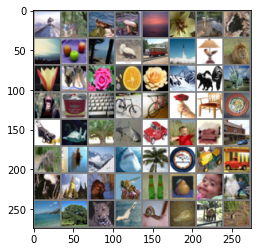

GroundTruth:  mountain forest  seal mushroom   sea tulip camel butterfly cloud apple   sea skunk streetcar rocket  lamp  lion tulip  wolf  rose orange  rose mountain skunk dinosaur chimpanzee   can keyboard bicycle bicycle  rose chair plate lawn_mower turtle palm_tree shark pickup_truck   boy couch house porcupine cockroach mountain shark palm_tree clock lawn_mower pickup_truck skunk castle beaver   bee bottle  pear  baby flatfish   sea oak_tree leopard rocket snail crocodile camel rabbit


In [57]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

이제, 저장했던 모델을 불러오도록 하겠습니다 (주: 모델을 저장하고 다시 불러오는
작업은 여기에서는 불필요하지만, 어떻게 하는지 설명을 위해 해보겠습니다):



In [ ]:
net = VGGNet()
net.load_state_dict(torch.load(PATH))

좋습니다, 이제 이 예제들을 신경망이 어떻게 예측했는지를 보겠습니다:



In [59]:
device

device(type='cuda', index=0)

In [61]:
images=images.to(device)

In [62]:
outputs = net(images)

출력은 100개 분류 각각에 대한 값으로 나타납니다. 어떤 분류에 대해서 더 높은 값이
나타난다는 것은, 신경망이 그 이미지가 해당 분류에 더 가깝다고 생각한다는 것입니다.
따라서, 가장 높은 값을 갖는 인덱스(index)를 뽑아보겠습니다:



In [63]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(batch_size)))

Predicted:  bridge palm_tree camel otter   sea   bee kangaroo skunk   sea sweet_pepper television skunk train rocket  lamp  lion  rose mouse  rose  rose  rose mountain skunk willow_tree chimpanzee   can keyboard bicycle chimpanzee dinosaur chair clock lawn_mower shark palm_tree bicycle pickup_truck  girl couch train porcupine otter keyboard dolphin palm_tree   man sweet_pepper tractor possum castle otter camel bottle  pear  baby squirrel   sea oak_tree leopard dolphin snail trout kangaroo  worm




전체 데이터셋에 대해서는 어떻게 동작하는지 보겠습니다.



In [67]:
net

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2_x): Sequential(
    (0): BottleNeck(
      (residual_function): Sequential(
        (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU()
        (6): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (shortcut): Sequential(
     

In [72]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images=images.to(device)
        labels = labels.to(device)
#         print(images)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 49 %


100가지 분류 중 어떤 것들을 더 잘 분류하고, 어떤 것들을 더 못했는지 알아보겠습니다:



In [ ]:
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(100):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))